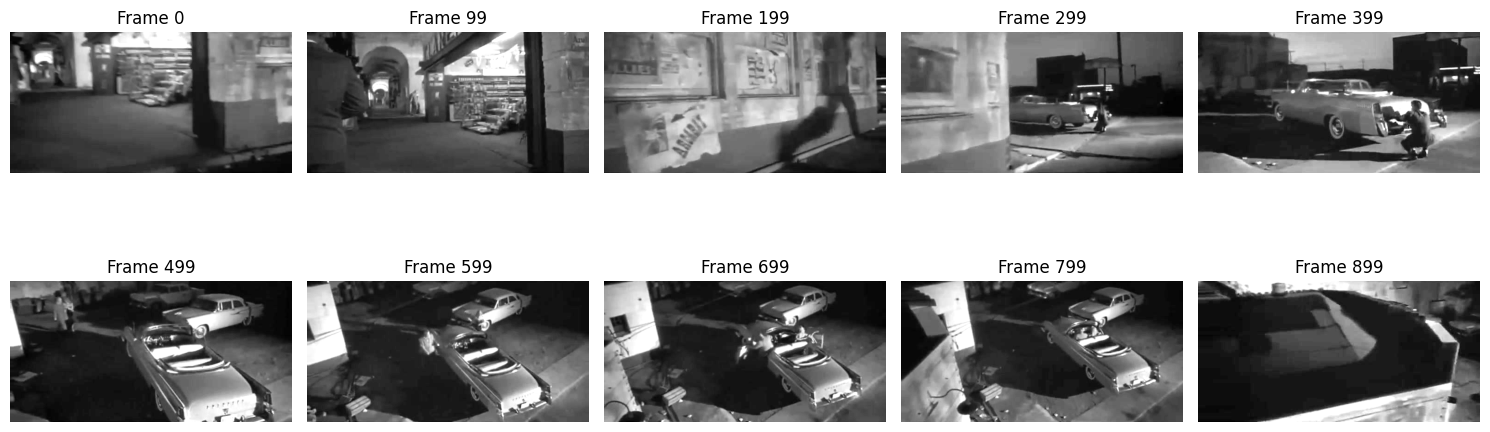

In [8]:
from allensdk.core.brain_observatory_cache import BrainObservatoryCache
from pathlib import Path   
import matplotlib.pyplot as plt 
import numpy as np

# 10 images should be picked at max distance from each other
allen_cache_path = '/home/maria/Documents/AllenBrainObservatory'
session_A = 501704220

boc = BrainObservatoryCache(manifest_file=str(
        Path(allen_cache_path) / Path('brain_observatory_manifest.json')))

def get_images_from_allen():
    # Load the dataset
    movie_one_dataset = boc.get_ophys_experiment_data(session_A)
    movie_one = movie_one_dataset.get_stimulus_template('natural_movie_one')

    # Select 10 images at maximum distance from each other
    num_images = 10
    total_images = movie_one.shape[0]
    indices = np.linspace(0, total_images - 1, num_images, dtype=int)
    selected_images = movie_one[indices]

    # Plot images in a 2x5 grid
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    axes = axes.flatten()
    for i, ax in enumerate(axes):
        ax.imshow(selected_images[i], cmap='gray')
        ax.axis('off')
        ax.set_title(f'Frame {indices[i]}')

    plt.tight_layout()
    plt.show()

get_images_from_allen()
